In [253]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [254]:
# data = pd.read_csv('mushrooms.csv').iloc[:500, :]
data = pd.read_csv('mushrooms.csv')

In [255]:
encoders = dict()
data_encoded = data.copy()

for i in range(data.shape[1]):
    encoder = LabelEncoder()
    column_name = data.columns[i]
    encoder.fit(data[column_name])
    data_encoded[column_name] = encoder.transform(data[column_name])
    encoders[column_name] = encoder

In [256]:
X = data_encoded.iloc[:,:data_encoded.shape[1]-1]
y = data_encoded.iloc[:,data_encoded.shape[1]-1]
y = np_utils.to_categorical(y)

In [257]:
train_x, test_x, train_y, test_y = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [258]:
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1] , activation = 'relu'))
model.add(Dropout(0.2, seed=0))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.3, seed=0))
model.add(Dense(13, activation = 'relu'))
model.add(Dropout(0.2, seed=0))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1, seed=0))
model.add(Dense(y.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

In [259]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5",
                               monitor='val_acc',
                               verbose=1,
                               save_best_only=True)

history = model.fit(train_x,
                    train_y,
                    epochs=200,
                    batch_size=150,
                    callbacks=[checkpointer],
                    validation_data=(test_x, test_y))

Epoch 1/200
 1/44 [..............................] - ETA: 13s - loss: 2.7400 - accuracy: 0.1133

2022-01-19 20:37:21.157034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 16ms/step - loss: 2.2392 - accuracy: 0.1546 - val_loss: 1.8860 - val_accuracy: 0.3034
Epoch 2/200
 1/44 [..............................] - ETA: 0s - loss: 1.9471 - accuracy: 0.1867

2022-01-19 20:37:21.882234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 12ms/step - loss: 1.8753 - accuracy: 0.2884 - val_loss: 1.7847 - val_accuracy: 0.4295
Epoch 3/200
44/44 [==============================] - 1s 11ms/step - loss: 1.7387 - accuracy: 0.3736 - val_loss: 1.6754 - val_accuracy: 0.4382
Epoch 4/200
44/44 [==============================] - 1s 12ms/step - loss: 1.6424 - accuracy: 0.3927 - val_loss: 1.5267 - val_accuracy: 0.5286
Epoch 5/200
44/44 [==============================] - 1s 12ms/step - loss: 1.6049 - accuracy: 0.3908 - val_loss: 1.4899 - val_accuracy: 0.5618
Epoch 6/200
44/44 [==============================] - 1s 12ms/step - loss: 1.5545 - accuracy: 0.4176 - val_loss: 1.4533 - val_accuracy: 0.5600
Epoch 7/200
44/44 [==============================] - 1s 11ms/step - loss: 1.5274 - accuracy: 0.4375 - val_loss: 1.4099 - val_accuracy: 0.5662
Epoch 8/200
44/44 [==============================] - 1s 11ms/step - loss: 1.5156 - accuracy: 0.4322 - val_loss: 1.3918 - val_accuracy: 0.5668
Epoch 9/200
44/44 

In [260]:
Y_encoder = encoders[data.columns[-1]]

In [261]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = Y_encoder.inverse_transform(y_pred)

2022-01-19 20:39:03.780104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [262]:
test_y_arg = np.argmax(test_y, axis = 1)
test_y_inverse = Y_encoder.inverse_transform(test_y_arg)

In [263]:
accuracy = accuracy_score(test_y_inverse, y_pred)
accuracy

0.6252307692307693

In [264]:
cm = confusion_matrix(y_pred, test_y_inverse)
cm

array([[521,   0,  96,   0, 115,   0,   0],
       [101, 420,   1,  62, 104,  70,  33],
       [ 14,   0,  72,   0,  13,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

In [265]:
print("\nHistory Keys:\n")
print(history.history.keys())


History Keys:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


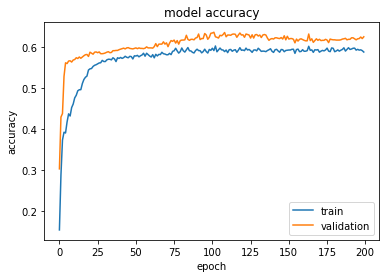

In [266]:
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

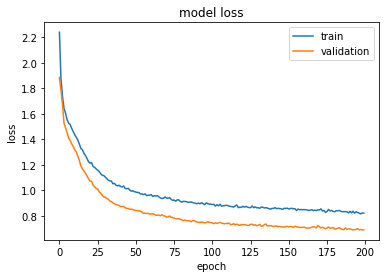

In [267]:
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()